In [1]:
import pandas as pd

df = pd.read_csv('Bank Customer Churn Prediction.csv')
df.head()

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [2]:
value_counts = df['churn'].value_counts()

value_counts

churn
0    7963
1    2037
Name: count, dtype: int64

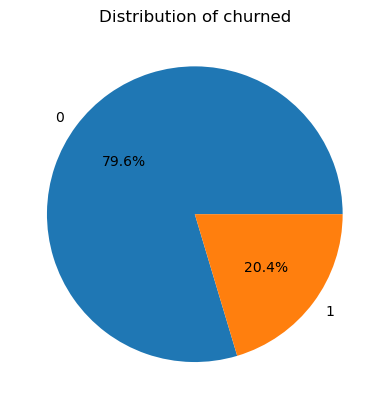

In [3]:
import matplotlib.pyplot as plt

labels = value_counts.index

counts = value_counts.values

plt.pie(counts, labels=labels, autopct='%1.1f%%')

plt.title('Distribution of churned')

plt.show()

In [4]:
from imblearn.over_sampling import RandomOverSampler

input_columns = df.drop('churn', axis=1)  

class_column = df['churn']

oversampler = RandomOverSampler(random_state=0)

input_columns_resampled, class_column_resampled = oversampler.fit_resample(input_columns, class_column)


df_balanced = pd.concat([input_columns_resampled, class_column_resampled], axis=1)

class_distribution = df_balanced['churn'].value_counts()
print(class_distribution)

churn
1    7963
0    7963
Name: count, dtype: int64


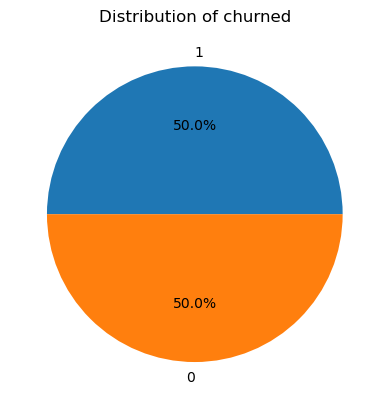

In [5]:
value_counts = df_balanced['churn'].value_counts()

labels = value_counts.index

counts = value_counts.values

plt.pie(counts, labels=labels, autopct='%1.1f%%')

plt.title('Distribution of churned')

plt.show()

In [6]:
X = df_balanced.iloc[:, 1:11].values
print(X)

[[619 'France' 'Female' ... 1 1 101348.88]
 [608 'Spain' 'Female' ... 0 1 112542.58]
 [502 'France' 'Female' ... 1 0 113931.57]
 ...
 [565 'Germany' 'Male' ... 1 0 175070.94]
 [553 'Spain' 'Female' ... 0 1 30730.95]
 [492 'France' 'Female' ... 1 1 182865.09]]


In [7]:
y = df_balanced.iloc[:, 11].values
print(y)

[1 0 1 ... 1 1 1]


In [8]:
print(X[:, 2])

['Female' 'Female' 'Female' ... 'Male' 'Female' 'Female']


In [9]:
from sklearn.preprocessing import LabelEncoder

labelencoder_gender = LabelEncoder()
X[:, 2] = labelencoder_gender.fit_transform(X[:, 2])

In [10]:
print(X[:, 2])

[0 0 0 ... 1 0 0]


In [11]:
labelencoder_gender.transform(["Male","Female"])

array([1, 0])

In [12]:
import numpy as np

distinct_values = np.unique(X[:, 1])
print(distinct_values)

['France' 'Germany' 'Spain']


In [13]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [1])], remainder='passthrough')


X = ct.fit_transform(X)

In [14]:
print(X[0])

[1.0 0.0 0.0 619 0 42 2 0.0 1 1 1 101348.88]


In [15]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

In [16]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

X_train = sc.fit_transform(X_train)

X_test = sc.transform(X_test)

print(X_train)

[[-0.93041226 -0.6660016   1.83627033 ... -1.55261795 -0.92478892
  -0.87888847]
 [ 1.07479237 -0.6660016  -0.54458213 ...  0.64407345 -0.92478892
  -1.26171023]
 [-0.93041226 -0.6660016   1.83627033 ...  0.64407345  1.08132784
   1.70394276]
 ...
 [-0.93041226 -0.6660016   1.83627033 ...  0.64407345  1.08132784
   0.83065375]
 [-0.93041226  1.50149789 -0.54458213 ...  0.64407345 -0.92478892
  -1.2493363 ]
 [-0.93041226  1.50149789 -0.54458213 ...  0.64407345 -0.92478892
   0.31223535]]


In [18]:
!pip install tensorflow

   ---------------------------------------- 0.0/390.3 MB ? eta -:--:--
   ---------------------------------------- 0.8/390.3 MB 4.8 MB/s eta 0:01:22
   ---------------------------------------- 1.8/390.3 MB 5.3 MB/s eta 0:01:14
   ---------------------------------------- 2.6/390.3 MB 4.4 MB/s eta 0:01:28
   ---------------------------------------- 3.7/390.3 MB 4.4 MB/s eta 0:01:27
   ---------------------------------------- 4.5/390.3 MB 4.5 MB/s eta 0:01:25
    --------------------------------------- 5.8/390.3 MB 4.7 MB/s eta 0:01:22
    --------------------------------------- 6.8/390.3 MB 4.9 MB/s eta 0:01:19
    --------------------------------------- 7.3/390.3 MB 4.5 MB/s eta 0:01:26
    --------------------------------------- 7.9/390.3 MB 4.2 MB/s eta 0:01:31
    --------------------------------------- 8.4/390.3 MB 4.1 MB/s eta 0:01:34
    --------------------------------------- 8.9/390.3 MB 3.9 MB/s eta 0:01:38
    --------------------------------------- 9.2/390.3 MB 3.8 MB/s eta 0

In [19]:
import numpy as np
import tensorflow as tf

np.random.seed(42)

tf.random.set_seed(42)

In [20]:
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()

In [21]:
input_dim = len(X_train[0])

model.add(Dense(6, activation = 'relu', input_dim = input_dim))

model.add(Dense(6, activation = 'relu'))

model.add(Dense(1, activation = 'sigmoid'))

C:\Users\user\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [22]:
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [23]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 6)                   │              78 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 6)                   │              42 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │               7 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 127 (508.00 B)

 Trainable params: 127 (508.00 B)

 Non-trainable params: 0 (0.00 B)

In [24]:
model.fit(X_train, y_train, batch_size = 10, epochs = 10)

Epoch 1/10
1195/1195 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.5729 - loss: 0.6890
Epoch 2/10
1195/1195 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.7037 - loss: 0.5686
Epoch 3/10
1195/1195 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.7178 - loss: 0.5507
Epoch 4/10
1195/1195 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7293 - loss: 0.5408
Epoch 5/10
1195/1195 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7362 - loss: 0.5307
Epoch 6/10
1195/1195 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7457 - loss: 0.5188
Epoch 7/10
1195/1195 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7585 - loss: 0.5076
Epoch 8/10
1195/1195 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7613 - loss: 0.4989
Epoch 9/10
1195/1195 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7621 - loss: 0.4911
Epoch 10/10
1195/1195 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7667 - loss: 0.4836


In [25]:
evaluation = model.evaluate(X_test, y_test)

print("Loss:", evaluation[0])
print("Accuracy:", evaluation[1])

125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7545 - loss: 0.4934
Loss: 0.491943359375
Accuracy: 0.7584128379821777


In [26]:
y_pred = model.predict(X_test)

y_pred_binary = (y_pred > 0.5)
y_pred_binary

125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


array([[False],
       [False],
       [ True],
       ...,
       [ True],
       [False],
       [ True]])

In [27]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

accuracy = accuracy_score(y_test, y_pred_binary)
print("Accuracy:", accuracy)

precision = precision_score(y_test, y_pred_binary)
print("Precision:", precision)

recall = recall_score(y_test, y_pred_binary)
print("Recall:", recall)

f1 = f1_score(y_test, y_pred_binary)
print("F1 Score:", f1)

Accuracy: 0.7584128578603717
Precision: 0.762241292276628
Recall: 0.7546226886556722
F1 Score: 0.7584128578603717


In [28]:
model = Sequential()

input_dim = len(X_train[0])

model.add(Dense(128, activation = 'relu', input_dim = input_dim))

model.add(Dense(64, activation = 'relu'))

model.add(Dense(32, activation = 'relu'))

model.add(Dense(16, activation = 'relu'))

model.add(Dense(8, activation = 'relu'))

model.add(Dense(1, activation = 'sigmoid'))

model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy' ])

model.fit(X_train, y_train, batch_size = 10, epochs = 20)

Epoch 1/20


C:\Users\user\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1195/1195 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.7034 - loss: 0.5519
Epoch 2/20
1195/1195 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7814 - loss: 0.4539
Epoch 3/20
1195/1195 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.7908 - loss: 0.4377
Epoch 4/20
1195/1195 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8016 - loss: 0.4243
Epoch 5/20
1195/1195 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8104 - loss: 0.4099
Epoch 6/20
1195/1195 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8199 - loss: 0.3944
Epoch 7/20
1195/1195 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8280 - loss: 0.3767
Epoch 8/20
1195/1195 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8369 - loss: 0.3618
Epoch 9/20
1195/1195 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8455 - loss: 0.3465
Epoch 10/20
1195/1195 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8514 - loss: 0.3344
Epoch 11/20
1195/1195 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8597 - loss: 0.3220
Epoch 12/20
1195/1195 ━━━━━━━━━━━━━━━━━━━

In [29]:
y_pred = model.predict(X_test)

y_pred_binary = (y_pred > 0.5)

accuracy = accuracy_score(y_test, y_pred_binary)
print("Accuracy:", accuracy)

precision = precision_score(y_test, y_pred_binary)
print("Precision:", precision)

recall = recall_score(y_test, y_pred_binary)
print("Recall:", recall)

f1 = f1_score(y_test, y_pred_binary)
print("F1 Score:", f1)

125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Accuracy: 0.8337518834756403
Precision: 0.8211031175059952
Recall: 0.8555722138930535
F1 Score: 0.8379833578071464


In [30]:
model.save("churn_model.keras")

In [31]:
from joblib import dump

dump(labelencoder_gender, "churn_label_encoder.pkl")

['churn_label_encoder.pkl']

In [32]:
from joblib import dump

dump(ct, "churn_column_transformer.pkl")

['churn_column_transformer.pkl']

In [33]:
from joblib import dump

dump(sc, "churn_standard_scaler.pkl")

['churn_standard_scaler.pkl']

In [40]:
new_customer = np.array( [[800,"Spain","Female",39, 1, 70000, 2, 0, 1, 60000]])

In [41]:
from joblib import load

labelencoder_gender_loaded=load("churn_label_encoder.pkl")

new_customer[:, 2] = labelencoder_gender_loaded.transform(new_customer[:, 2])

In [42]:
from joblib import load

ct_loaded = load("churn_column_transformer.pkl")

new_customer = ct.transform(new_customer)

In [43]:
from joblib import load

sc_loaded = load("churn_standard_scaler.pkl")

new_customer = sc_loaded.transform(new_customer)
print(new_customer)

[[-0.93041226 -0.6660016   1.83627033  1.53598015 -1.01569584 -0.1962976
  -1.36281484 -0.18972614  0.73346722 -1.55261795  1.08132784 -0.70839527]]


In [38]:
from keras.models import load_model

loaded_model = load_model("churn_model.keras")

In [44]:
new_prediction_proba = loaded_model.predict(new_customer)

new_prediction = (new_prediction_proba > 0.5)

print(new_prediction)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
[[ True]]
